# KNN

## Introdução

O KNN (K-nearest neighbors ou K vizinhos mais próximos) é um algoritmo de aprendizado supervisionado introduzido nos anos 50, mas ainda utilizado em problemas de classificação e regressão. 

A ideia por trás desse algoritmo é que pontos similares se encontram próximos uns dos outros, então ele calcula a diferença entre cada tupla e a nova tupla e a classifica a partir dos K vizinhos mais próximos, como o nome indica.

Esse princípio pode ser visualizado mais facilmente para uma classificação com 2 variáveis na imagem abaixo.

<img src='https://miro.medium.com/max/640/1*0Pqqx6wGDfFm_7GLebg2Hw.png'>
<!--Imagem de https://towardsdatascience.com/k-nn-on-iris-dataset-3b827f2591e -->

## Vantagens e desvantagens

### Vantagens
* Fácil de implementar
* Não consome tempo construindo um modelo de classificação e o classificador se adapta imediatamente à novos dados
* Bom para alguns casos onde a precisão é importante

### Desvantagens
* Não constrói um modelo de classificação e, portanto, tem um grande custo comparando novas tuplas com o resto dos exemplos de treinamento
* Suscetível à ruídos classificados perto da nova tupla
* Precisa de dados balanceados

## Base matemática

A base matemática desse modelo consiste em escolher uma métrica de distância e um número para K apropriados.

### Distância

A distância entre duas duplas pode ser calculada por diferentes métricas, das quais 2 mais comuns serão apresentadas a seguir:

* **Distância euclidiana**: A menor distância entre 2 pontos é uma reta que pode ser calculada pelo Teorema de Pitágoras.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/300px-Euclidean_distance_2d.svg.png'>

* **Distância de Manhattan**: Também conhecida como distância L, a distância entre 2 pontos (x1,y1) e (x2,y2) é dada por |x1-x2| + |y1-y2|.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/200px-Manhattan_distance.svg.png'>

## Melhor número para K

O valor de K define quantos vizinhos são verificados para decidir a classificação da nova tupla, ou seja:

Para K=1, a nova instância terá a mesma classificação que seu vizinho mais próximo.

Para K=3, se pelo menos 2 dos vizinhos mais próximos tiverem a mesma classificação, essa será a classificação dada à nova tupla.

Valores de K pequenos tendem a ter menor viés, mas maior variância enquanto valores maiores de K possuem menor variância, mas um maior viés, então esse é um parâmetro importante para regular overfitting (sobreajuste) do modelo aos dados.

Então é recomendado que sejam testados diversos valores de K para os dados de teste.

<img src='https://miro.medium.com/max/720/1*P1Hqy-72bsJdPmwFi6s-4Q.webp' width=500>

## Aplicações

Algumas aplicações onde são encontrados usos do KNN:

* Estimar valores faltando de dados em um dataset

* Sistemas de recomendações

* Detecção de fraudes de cartão de crédito

## Exemplo

Nesse exemplo é utilizado o "breast cancer wisconsin dataset" fornecido pelo sci kit learn.

Esse dataset possui 569 exemplares com 30 características e o objetivo é classificar cada um em 'benigno' ou 'maligno'.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_treino, x_teste, y_treino, y_teste = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

clf = KNeighborsClassifier()
clf.fit(x_treino, y_treino)
predicao = clf.predict(x_teste)

print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.96      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Resultados mais específicos

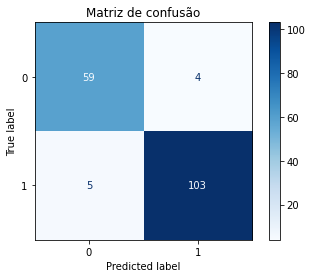

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

matriz_confusao = ConfusionMatrixDisplay.from_estimator(
    clf,
    x_teste,
    y_teste,
    cmap=plt.cm.Blues,
    normalize=None,
)
matriz_confusao.ax_.set_title('Matriz de confusão')

plt.show()

In [ ]:
import pandas as pd

dados = {'Predição': predicao, 
         'Classificação real': y_teste}

tabela_comparativa = pd.DataFrame(data=dados)

# Destacando dados discrepantes na tabela
def destacar_discrepancia(df):
    if df['Predição'] != df['Classificação real']:
        return['background-color: pink'] * 2
    else:
        return['background-color: lightblue'] * 2

display(tabela_comparativa.style.apply(destacar_discrepancia, axis=1))

,Predição,Classificação real
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


## Fontes bibliográficas

[1] Nearest Neighbors. Sci-kit learn. Disponível em: https://scikit-learn.org/stable/modules/neighbors.html#classification

[2] K-Nearest Neighbors Algorithm. IBM. Disponível em: https://www.ibm.com/topics/knn

[3] Machine Learning Basics with the K-Nearest Neighbors Algorithm. Towardsdatascience. Disponível em: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761